In [104]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [105]:
aug_positive = pd.read_csv('AUGbaseToReads_processedData_24filesDec_ACTTGA-s_7_1.txt'
                          ,sep='\t',header=None)
aug_positive.columns = ['x', 'y']

In [120]:
aug_positive

,x,y
0,-102,0.039170
1,-101,0.039085
2,-100,0.049054
3,-99,0.040412
4,-98,0.040102
...,...,...
401,299,0.059418
402,300,0.062892
403,301,0.021576
404,302,0.053318


In [121]:
aug_p = aug_positive[(aug_positive['x']<31) & (aug_positive['x']>-31)].reset_index(drop=True)
aug_n = aug_p[::]

In [127]:
aug_n.loc[:,'y']=np.random.randint(1, 30, 61)/40

In [128]:
aug_p['Type']='Distance from CDS start'

In [129]:
aug_p['Frame']=aug_p['x'].values%3+1

In [130]:
aug_p['x_str']=aug_p['x'].astype(str)

In [131]:
aug_p['Color']=(sns.color_palette(n_colors=3)*21)[0:61]

([<matplotlib.axis.XTick at 0x1a20203710>,
 <a list of 13 Text xticklabel objects>)

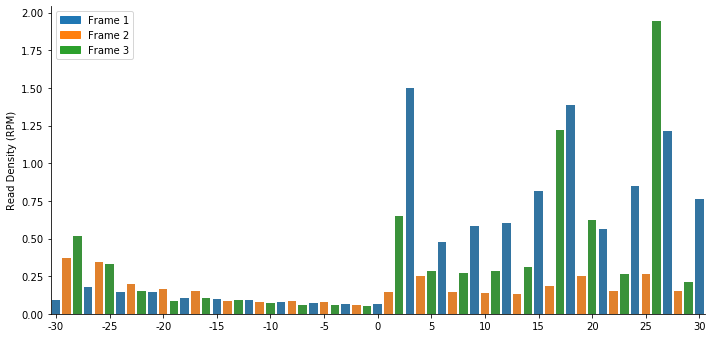

In [136]:
import matplotlib.pyplot as plt
g=sns.catplot(x='x',y='y',palette=aug_p['Color'],
           kind='bar',data=aug_p,aspect=2)
g.set_axis_labels("", "Read Density (RPM)")

colors = {'Frame 1':sns.color_palette(n_colors=3)[0],
          'Frame 2':sns.color_palette(n_colors=3)[1],
         'Frame 3':sns.color_palette(n_colors=3)[2]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(np.arange(0,61,5), aug_p.x[0:61:5])#, rotation='vertical')

#g.savefig('test.eps')

In [101]:
(list(np.arange(0,61,5)),list(aug_p.x[0:61:5].values))

([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
 [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])

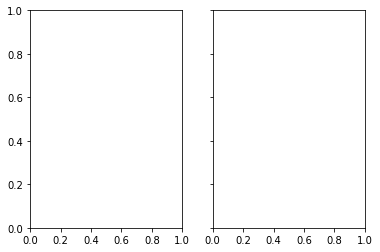

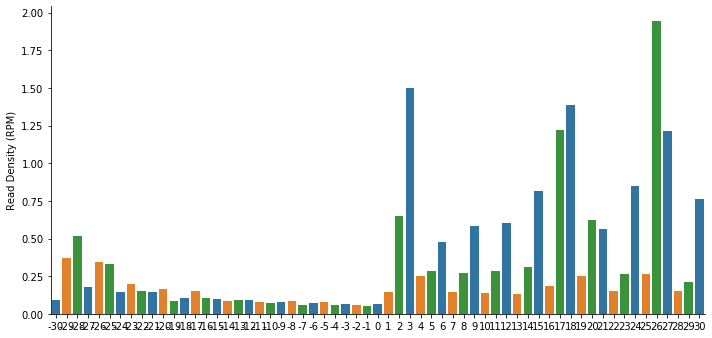

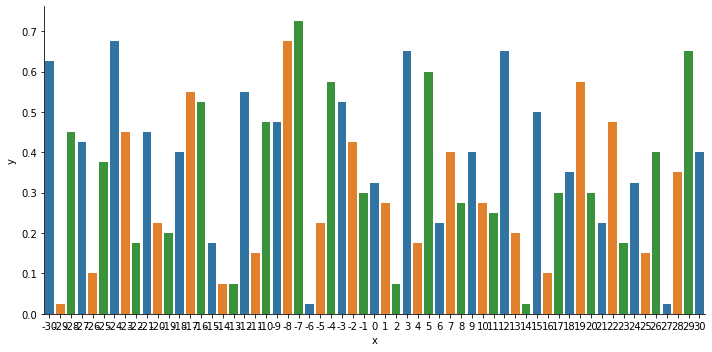

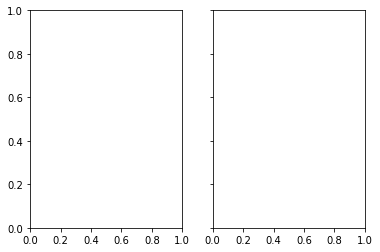

In [148]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True)
fig1=sns.catplot(x='x',y='y',palette=aug_p['Color'],
           kind='bar',data=aug_p,aspect=2)
fig1.set_axis_labels("", "Read Density (RPM)")
fig2=sns.catplot(x='x',y='y',palette=aug_p['Color'],
           kind='bar',data=aug_n,aspect=2)
ax=fig1.axes[0][0]
ax2=fig2.axes[0][0]
colors = {'Frame 1':sns.color_palette(n_colors=3)[0],
          'Frame 2':sns.color_palette(n_colors=3)[1],
         'Frame 3':sns.color_palette(n_colors=3)[2]}         
#labels = list(colors.keys())
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)

#plt.xticks(np.arange(0,61,5), aug_p.x[0:61:5])#, rotation='vertical')

#g.savefig('test_break.eps')


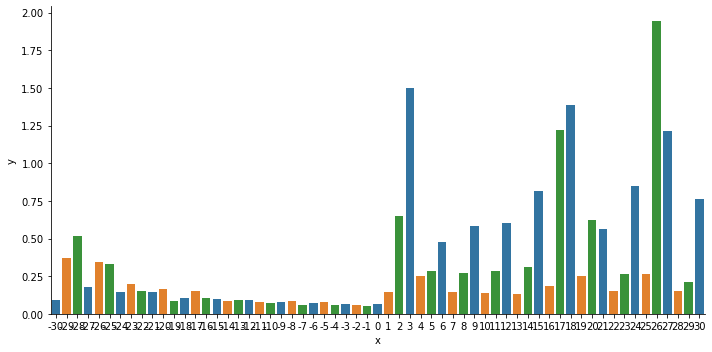

In [137]:
a=sns.catplot(x='x',y='y',palette=aug_p['Color'],
           kind='bar',data=aug_p,aspect=2)

In [145]:
type(f)

matplotlib.figure.Figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


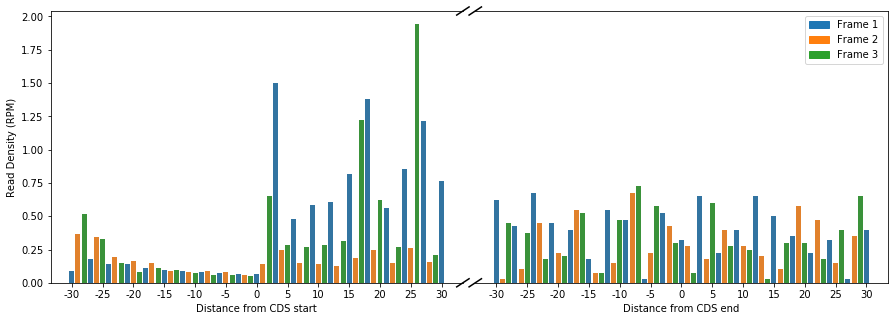

In [240]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
plt.subplots_adjust(wspace=0.03)
sns.barplot(x='x',y='y',palette=aug_p['Color'],
           data=aug_p,ax=ax)#,aspect=2)
ax.set_xlabel("Distance from CDS start")#, 
ax.set_ylabel("Read Density (RPM)")

sns.barplot(x='x',y='y',palette=aug_p['Color'],
           data=aug_n,ax=ax2)
ax2.set_xlabel("Distance from CDS end")#, 
ax2.set_ylabel("")
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.yaxis.set_ticks_position('none') 

plt.sca(ax)
plt.xticks(np.arange(0,61,5), aug_p.x[0:61:5])#, rotation='vertical')
plt.sca(ax2)
plt.xticks(np.arange(0,61,5), aug_p.x[0:61:5])#, rotation='vertical')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot(( -d, +d), (- d, +d), **kwargs)  # bottom-right diagonal
colors = {'Frame 1':sns.color_palette(n_colors=3)[0],
          'Frame 2':sns.color_palette(n_colors=3)[1],
         'Frame 3':sns.color_palette(n_colors=3)[2]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
f.savefig('test_comb.eps')